In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pickle

Data Preparation


In [ ]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

In [5]:
# Preprocess data, drop irrelevent features
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [6]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
# Encode gender as a categorial variable
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

In [27]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [ ]:
# One hot encode Geography column
onehot_encoder_geo = OneHotEncoder(sparse_output=False)
geo_encoder = onehot_encoder_geo.fit_transform(data[['Geography']])
geo_encoder

In [ ]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

In [22]:
# Create a new dataframe for the one hot encoded columns for further processing
geo_encoded_df = pd.DataFrame(geo_encoder, columns=onehot_encoder_geo.get_feature_names_out(['Geography']))

In [ ]:
geo_encoded_df

In [ ]:
# Combine the one hot encoded columns with the original dataframe
data = pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

In [ ]:
# Verify the updated changes
data.head()

In [29]:
# Save the encoders and scaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo, file)

In [ ]:
# Divide the dataset into independant and dependant features

# dependant
X = data.drop('Exited',axis=1) 
# independant
y = data['Exited'] 

# Split the data into training and test sets - 20% test (.2) size, 80% training size
# random_state ensures reproducibility by setting a fixed random seed, so the split is the same every time the code is run
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scale the features - Standardizes features by removing the mean and scaling to unit variance. Each feature will have a mean of 0 and a standard deviation of 1
# fit_tranform computes the mean and standard deviation from X_train (training data) and then scales it
# transform uses the previously computed mean and standard deviation to scale X_test (test data) without recalculating them
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [33]:
X_test

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [34]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler, file)

In [ ]:
# Final validation of the data prep work
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


Implement the ANN
1) Create Sequential Network
2) Use Dense() function to define the hidden layers (nodes)
3) Apply the activation function to every node - Sigmoid (output, bin-class), Softmax (output, multi-class) Relu (ideally for hidden layers), etc.
4) Optimizer - used for backprop to update the weights
5) Applt the loss function to reduce gradient decent
6) Metrics - accuracy (classification), mean squared error /  mean absolute error (regression)
7) Log training information to a directory and then use tensorboard to visualize

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [40]:
# Inputs will be defined for the 1st hidden layer based on the columns, passed as a tuple as per the comma
(X_train.shape[1],)

(12,)

In [42]:
# Build the ANN model
model = Sequential([
    # Define 64 hidden nodes for the first layer, relu as the activation function, and 12 inputs for the first hidden layer only (will be connected/passed to other layers)
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    # Define 32 hidden layers for the second layer, apply relu, no need to add shape 
    Dense(43,activation='relu'),
    # Define the output layer, sigmoid activation funcion since this is a binary classification problem
    Dense(1,activation='sigmoid')
])

In [43]:
# View the parameter summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 43)                2795      
                                                                 
 dense_5 (Dense)             (None, 1)                 44        
                                                                 
Total params: 3671 (14.34 KB)
Trainable params: 3671 (14.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


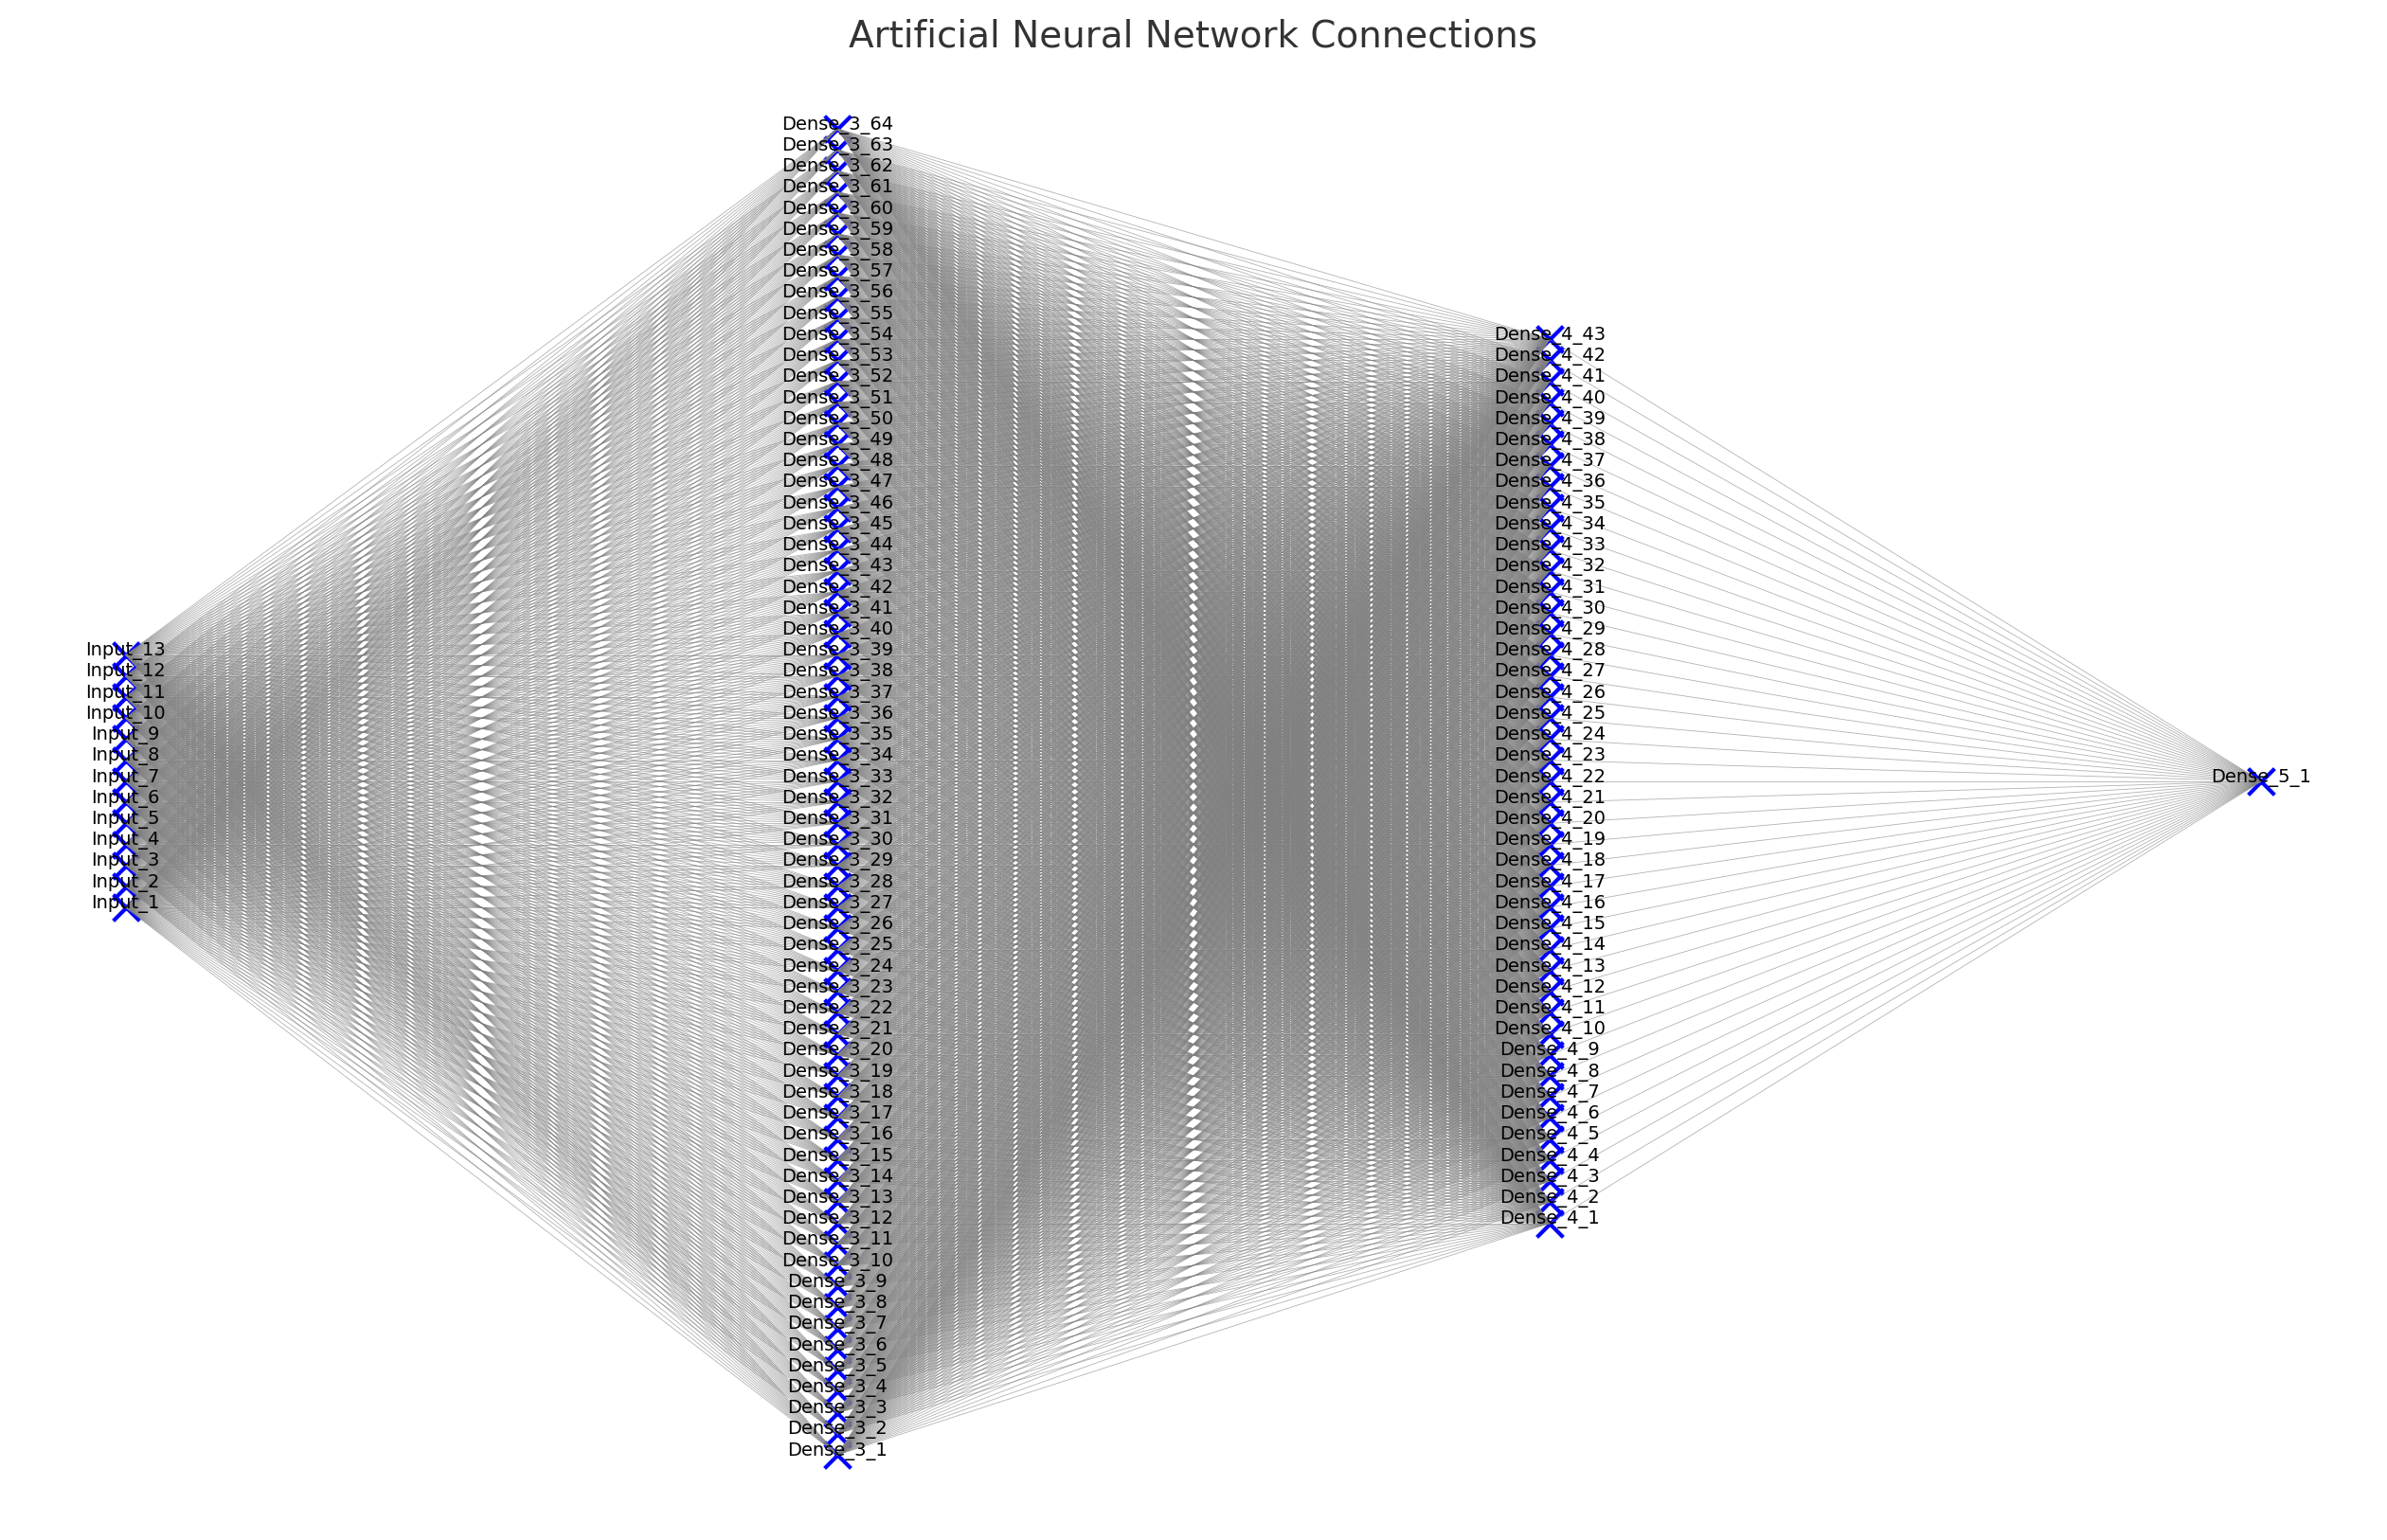

In [44]:
# Define the optimzer 
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy()
loss

In [45]:
# Compile the model to enable forward and backward propogation
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])


In [ ]:
# Set up the Tensorboard and define the logging directory and file format
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [47]:
# Set up early stopping so we can halt the epochs once the loss value is no longer decreasing (run at least 5 epochs and reload the best weights found)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

In [ ]:
model.save('model.h5')

In [51]:
# Load Tensorboard extension
%load_ext tensorboard

In [53]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 11566), started 0:02:09 ago. (Use '!kill 11566' to kill it.)